* https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

* https://radimrehurek.com/gensim/models/ldamodel.html

In [170]:
import gensim, matplotlib.pyplot
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
np.random.seed(2018)
import nltk
from gensim import corpora, models
from pprint import pprint
from matplotlib import pyplot as plt

In [54]:
# load initial CSV
data = pd.read_csv('actor_words.csv', error_bad_lines=True, sep="\t");

In [4]:
len(data)

8743

In [5]:
data.head()

,actor_id,words
0,nm9117281,richard spencer refer edit richard spencer roy...
1,nm0000239,tyler tyler septemb bear rundgren juli york ci...
2,nm3931285,terri moor refer terri moor basebal american m...
3,nm1483196,jerri ferrara bear novemb brooklyn york occup ...
4,nm1636181,peopl steven fletcher steve fletcher fletcher ...


In [57]:
# Documents becomes an array of words
documents = [doc.split(' ') for doc in data['words']]

In [62]:
dictionary = gensim.corpora.Dictionary(documents)

In [63]:
[v for v in dictionary.values()][:10]

['american',
 'archdioces',
 'articl',
 'athlet',
 'ball',
 'bear',
 'bishop',
 'british',
 'cathol',
 'chang']

###  Filter out tokens that appear in
* less than 15 documents (absolute number) or
* more than 0.5 documents (fraction of total corpus size, not absolute number).
* after the above two steps, keep only the first 100000 most frequent tokens.


In [64]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [65]:
[v for v in dictionary.values()][:10]

['articl',
 'athlet',
 'ball',
 'bishop',
 'british',
 'cathol',
 'chang',
 'charact',
 'cuban',
 'direct']

In [66]:
# bow_documents are documents described by word ids.

bow_documents = [dictionary.doc2bow(doc) for doc in documents]

In [163]:
doc_len = []
for doc in bow_documents:
    n_words = 0
    for words in doc:
        n_words += words[1]
    doc_len.append(n_words)

<BarContainer object of 8743 artists>

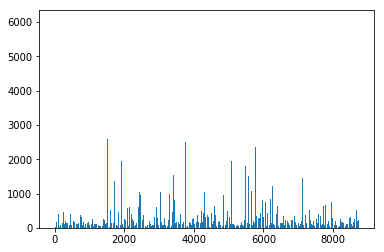

In [173]:
plt.bar(range(len(doc_len)), doc_len)

In [171]:
def plot_doc(doc):
    plt.plot([e[0] for e in doc], [e[1] for e in doc])

In [219]:
dictionary[bow_documents[5][0][0]]

'refer'

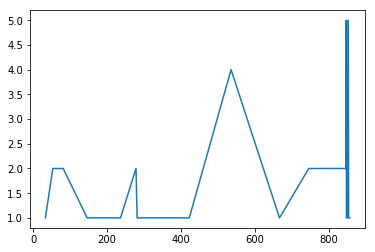

In [172]:
plot_doc(bow_documents[5])

In [35]:
def preview_bow_doc(bow_doc, limit=10000):
    for i in range(min(len(bow_doc), limit)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc[i][0],
                                                     dictionary[bow_doc[i][0]], 
                                                     bow_doc[i][1]))

In [86]:
preview_bow_doc(bow_documents[5])

# Wiki link for doc #5: https://en.wikipedia.org/wiki/Justine_Lupe

Word 33 ("refer") appears 1 time.
Word 53 ("actress") appears 2 time.
Word 81 ("art") appears 2 time.
Word 146 ("citi") appears 1 time.
Word 201 ("drama") appears 1 time.
Word 208 ("educ") appears 1 time.
Word 236 ("father") appears 1 time.
Word 278 ("graduat") appears 2 time.
Word 281 ("grandmoth") appears 1 time.
Word 336 ("john") appears 1 time.
Word 359 ("legal") appears 1 time.
Word 422 ("name") appears 1 time.
Word 535 ("school") appears 4 time.
Word 666 ("york") appears 1 time.
Word 745 ("theater") appears 2 time.
Word 845 ("colorado") appears 2 time.
Word 846 ("denver") appears 5 time.
Word 847 ("exhibit") appears 1 time.
Word 848 ("grow") appears 1 time.
Word 849 ("harri") appears 1 time.
Word 850 ("juilliard") appears 2 time.
Word 851 ("justin") appears 3 time.
Word 852 ("lupe") appears 5 time.
Word 853 ("museum") appears 1 time.
Word 854 ("program") appears 1 time.
Word 855 ("sitcom") appears 1 time.
Word 856 ("specialist") appears 1 time.


In [85]:
data.iloc[5,]

actor_id                                            nm4419771
words       justin lupe bear denver colorado educ juilliar...
Name: 5, dtype: object

In [189]:
n_topics = 6
lda_model = gensim.models.LdaMulticore(bow_documents, num_topics=n_topics,
                                       id2word=dictionary, passes=2, workers=2)

In [108]:
lda_model.save('./lda_simple_8743.model')

/home/ubuntu/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/ubuntu/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [91]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

Topic: 0 
Words: 0.012*"sourc" + 0.010*"live" + 0.009*"remov" + 0.008*"actress" + 0.007*"help" + 0.006*"citat" + 0.006*"messag" + 0.006*"templat" + 0.006*"learn" + 0.006*"articl"
Topic: 1 
Words: 0.009*"album" + 0.009*"releas" + 0.009*"award" + 0.008*"music" + 0.007*"perform" + 0.005*"song" + 0.005*"best" + 0.005*"work" + 0.005*"comedi" + 0.005*"actress"
Topic: 2 
Words: 0.010*"race" + 0.007*"season" + 0.007*"model" + 0.005*"time" + 0.004*"finish" + 0.004*"work" + 0.004*"second" + 0.004*"hilton" + 0.004*"award" + 0.004*"actress"
Topic: 3 
Words: 0.015*"match" + 0.012*"championship" + 0.010*"fight" + 0.009*"orton" + 0.009*"defeat" + 0.009*"wrestl" + 0.008*"titl" + 0.008*"cena" + 0.007*"team" + 0.007*"rossi"
Topic: 4 
Words: 0.006*"music" + 0.006*"releas" + 0.006*"season" + 0.005*"perform" + 0.005*"william" + 0.004*"video" + 0.004*"episod" + 0.004*"award" + 0.004*"charact" + 0.004*"school"
Topic: 5 
Words: 0.009*"footbal" + 0.008*"team" + 0.007*"link" + 0.007*"player" + 0.006*"season" + 

In [128]:
lda_model[bow_documents[2]]

[(5, 0.99098235)]

In [106]:
data.iloc[2,]

actor_id                                            nm3931285
words       terri moor refer terri moor basebal american m...
Name: 2, dtype: object

In [148]:
(np.array(len(documents)))

array(8743)

In [175]:
documents.iloc[:, 0].values

AttributeError: 'list' object has no attribute 'iloc'

### Calculate results for visualisation of topics

https://pyldavis.readthedocs.io/en/latest/modules/API.html#pyLDAvis.prepare

In [132]:
import pyLDAvis

In [138]:
lda_model.get_topic_terms(1)

[(1811, 0.009487415),
 (506, 0.009080396),
 (757, 0.008522481),
 (24, 0.0076768952),
 (459, 0.007056268),
 (570, 0.0054725218),
 (100, 0.00503773),
 (661, 0.0050180694),
 (150, 0.00491207),
 (53, 0.004786604)]

In [186]:
len(bow_documents)

8743

In [292]:
doc_topic_dist_df = np.zeros((len(bow_documents), n_topics))

for n_doc in range(len(bow_documents)):
    doc_topics = lda_model.get_document_topics(bow_documents[n_doc])
    for topic in doc_topics:
        topic_no = topic[0]
        topic_pro = topic[1]
        if topic_no == 0:
            doc_topic_dist_df[n_doc][0] = round(topic_pro, 7)
        elif topic_no == 1:
            doc_topic_dist_df[n_doc][1] = round(topic_pro, 7)
        elif topic_no == 2:
            doc_topic_dist_df[n_doc][2] = round(topic_pro, 7)
        elif topic_no == 3:
            doc_topic_dist_df[n_doc][3] = round(topic_pro, 7)
        elif topic_no == 4:
            doc_topic_dist_df[n_doc][4] = round(topic_pro, 7)
        elif topic_no == 5:
            doc_topic_dist_df[n_doc][5] = round(topic_pro, 7)
        else:
            print('ERROR')
    
    # make sure each row sum ==1.0
    if np.sum(doc_topic_dist_df[n_doc]) > 1.0:
        diff = np.sum(doc_topic_dist_df[n_doc]) -1.0
        max_topic_pro = np.max(doc_topic_dist_df[n_doc])
        for i in range(n_topics):
            if doc_topic_dist_df[n_doc][i] == max_topic_pro:
                doc_topic_dist_df[n_doc][i] -= diff
                break
    elif np.sum(doc_topic_dist_df[n_doc]) < 1.0:
        diff = 1.0 - np.sum(doc_topic_dist_df[n_doc])
        min_topic_pro = np.min(doc_topic_dist_df[n_doc])
        for i in range(n_topics):
            if doc_topic_dist_df[n_doc][i] == 0.0 or doc_topic_dist_df[n_doc][i] == min_topic_pro:
                doc_topic_dist_df[n_doc][i] += diff
                break


print(doc_topic_dist_df)

[[0.00753517 0.         0.32552081 0.49933541 0.         0.1676086 ]
 [0.3827025  0.53115022 0.0270328  0.00624418 0.0164739  0.0363964 ]
 [0.00723501 0.         0.22394679 0.7688182  0.         0.        ]
 ...
 [0.47436729 0.333895   0.00158241 0.0910694  0.0990859  0.        ]
 [0.00431532 0.         0.         0.         0.         0.99568468]
 [0.99343938 0.00656062 0.         0.         0.         0.        ]]


[[0.         0.         0.3093394  0.51220649 0.         0.16569659]
 [0.36803871 0.53451729 0.02752784 0.         0.02291167 0.0381226 ]
 [0.         0.         0.22318314 0.76958179 0.         0.        ]
 ...
 [0.46657619 0.33759424 0.         0.09136408 0.10288303 0.        ]
 [0.         0.         0.         0.         0.         0.99568474]
 [0.99276525 0.         0.         0.         0.         0.        ]]


In [298]:
np.any(np.sum(doc_topic_dist_df,axis=1) == 1.0)

True

In [293]:
np.sum(np.sum(doc_topic_dist_df,axis=1))

8743.0

In [205]:
(lda_model.get_topics()).shape

(6, 9507)

In [215]:
vocab = np.array([v for v in dictionary.values()])
vocab.shape

(9507,)

In [231]:
dictionary_frec = np.zeros(vocab.shape)
for doc in bow_documents:
    for word in doc:
        dictionary_frec[word[0]] += word[1]
print(dictionary_frec)

In [299]:
# topic term distribution:shape (n_topics, n_terms), where n_terms is len(vocab)
# The probability for each word in each topic, shape (num_topics, vocabulary_size).
topic_term_dist = lda_model.get_topics()
print(topic_term_dist.shape)

# doc_topic_dists :array-like, shape (n_docs, n_topics)
# Matrix of document-topic probabilities.
doc_topic_dist = doc_topic_dist_df
print(doc_topic_dist.shape)

# doc_lengths :array-like, shape n_docs
# The length of each document
doc_length = np.array(doc_len)
print(doc_length.shape)

# vocab :array-like, shape n_terms
# list of all the words in the corpus used to train the model
vocab = np.array([v for v in dictionary.values()])
print(vocab.shape)

# term_frequency :array-like, shape n_terms
# The count of each particular term over the entire corpus. 
# The ordering of these counts should correspond with vocab and topic_term_dists.
term_frec = np.array(dictionary_frec)
print(term_frec.shape)


(6, 9507)
(8743, 6)
(8743,)
(9507,)
(9507,)


In [300]:
topics = pyLDAvis.prepare(topic_term_dist, doc_topic_dist, doc_length, vocab, term_frec)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [304]:
pyLDAvis.save_html(topics, fileobj="results.html")